# Global Surface Temperature Anomalies

![Map of global surface temperature anomalies](images/global_surface_temperature_anomalies.png)

The **NOAA Global Surface Temperature Dataset** provides **monthly global land-ocean surface temperature data**, derived from:  
- The **Extended Reconstructed Sea Surface Temperature (ERSST)** analysis.  
- The **Global Historical Climatology Network - Monthly (GHCN-M)** land surface air temperature analysis.
It supports **global climate monitoring** by combining **sea surface temperatures** with **land surface air temperatures**.

## Data characteristics
- **Spatial resolution**: 5° latitude × 5° longitude.  
- **Temporal coverage**: Monthly values from 1850 to the present.  
- **Reference period**: Anomalies calculated relative to the 1971–2000 climatology.  

> **Note:** To adjust anomalies for other climatology periods, calculate the average anomaly for the desired period and subtract it from the original anomalies.

## Useful Links

- **Dataset Information Page**  
  https://www.ncei.noaa.gov/products/land-based-station/noaa-global-temp 

- **Dataset Landing Page**  
  https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C01704/html 

- **OPeNDAP URL**  
  https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc
  > *You can use this URL in your scripts like a local file path!*
  
- **WMS URL**
  https://www.ncei.noaa.gov//thredds/wms/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc

- **THREDDS Catalogue**
  - Human interface: https://www.ncei.noaa.gov/thredds/catalog/noaa-global-temp-v6/catalog.html
  - Machine interface: https://www.ncei.noaa.gov/thredds/catalog/noaa-global-temp-v6/catalog.xml


## Crediting the Data Providers

When using this dataset in publications or presentations, please provide the following citation:  

> **Huang, Boyin; Yin, Xungang; Menne, Matthew J.; Vose, Russell S.; and Zhang, Huai-Min. 2024.**  
> NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 6.0. [indicate subset used].  
> NOAA National Centers for Environmental Information. https://doi.org/10.25921/rzxg-p717.  
> Accessed [date].


## Exploring the data in Python



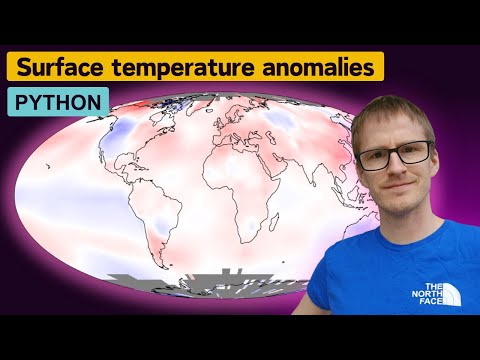

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('czLlSVQgXB0')

### Importing modules

In [1]:
import xarray as xr # For reading data from a NetCDF file
import matplotlib.pyplot as plt # For plotting the data
import cartopy.crs as ccrs # For plotting maps

### Opening and understanding the data

The data have been published in a CF-NetCDF file. Whilst it is possible to directly download these data, we are not going to do that. The data are served over a THREDDS catalogue:

https://www.ncei.noaa.gov/thredds/catalog/noaa-global-temp-v6/catalog.html

If you click on the `.nc` file you will find the OPeNDAP Data Access Form:

https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc.html

This provides a way of streaming data over the internet so you don't have to download them to your own computer. Simply copy the Data URL, or remove `.html` from the URL above.

Now let's access the data using xarray.

In [2]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc'
xrds = xr.open_dataset(url)
xrds

OSError: [Errno -90] NetCDF: file not found: b'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc'

The data have 4 dimensions, `time`, `lat`, `lon` and `z`. However, `z` has a length of 1, simply indicating that the data are at the surface. So the `anom` variable is essentially a 3D array of values. Each variable has metadata associated it, and the dataset as a whole has 66 *global* attributes.

Let's have a look at the variable attributes for the `anom` variable for example.

In [3]:
xrds['anom'].attrs

{'long_name': 'Global Temperature Anomalies',
 'standard_name': 'surface_temperature_anomaly',
 'coverage_content_type': 'physicalMeasurement',
 'units': 'degrees C',
 'valid_min': -40.0,
 'valid_max': 40.0}

The `standard_name` is taken from the CF standard name table, which can be found at:

https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html

Standard names are accompanied by a description for the data. The data provider should have carefully read the description upon selecting the standard name, and the data user can also read the description, so the data user and provider share some common understanding about what the data are. This also makes the variable machine-readable.  The description for `surface_temperature_anomaly` is:

> The surface called "surface" means the lower boundary of the atmosphere. "anomaly" means difference from climatology. The surface temperature is the (skin) temperature at the interface, not the bulk temperature of the medium above or below. It is strongly recommended that a variable with this standard name should have the attribute units_metadata="temperature: difference", meaning that it refers to temperature differences and implying that the origin of the temperature scale is irrelevant, because it is essential to know whether a temperature is on-scale or a difference in order to convert the units correctly (cf. https://cfconventions.org/cf-conventions/cf-conventions.html#temperature-units).

## Writing the data to a CSV file

You can write all or a subset of the data to a pandas dataframe that you can export as a CSV file.

In [4]:
df = xrds['anom'].to_dataframe()
df.head()

anom
time       z   lat   lon           
1850-01-01 0.0 -87.5 2.5  -0.994635
                     7.5  -1.335905
                     12.5  0.393890
                     17.5 -0.737344
                     22.5  1.408530

In [5]:
df.to_csv('global_surface_temperature_anomalies.csv')

## Plotting the data for one month

Firstly, we need to isolate a single month of data for a desired date. The time coordinate has values for the 1st day of each month.

In [6]:
xrds['time'].values

array(['1850-01-01T00:00:00.000000000', '1850-02-01T00:00:00.000000000',
       '1850-03-01T00:00:00.000000000', ...,
       '2024-09-01T00:00:00.000000000', '2024-10-01T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000'], dtype='datetime64[ns]')

So to select data from one month:

In [7]:
desired_date = '2022-11-01'
data_for_desired_date = xrds.sel(time=desired_date)

If you accidentally select a date that isn't present in the time series, you can use `method = 'nearest'` to select the data from the nearest timestamp to the date you provide. Other methods can also be used, you can read about this here: 

https://docs.xarray.dev/en/latest/generated/xarray.Dataset.sel.html#xarray-dataset-sel

In [8]:
data_for_desired_date = xrds.sel(time=desired_date, method='nearest')

We can very quickly plot the data.

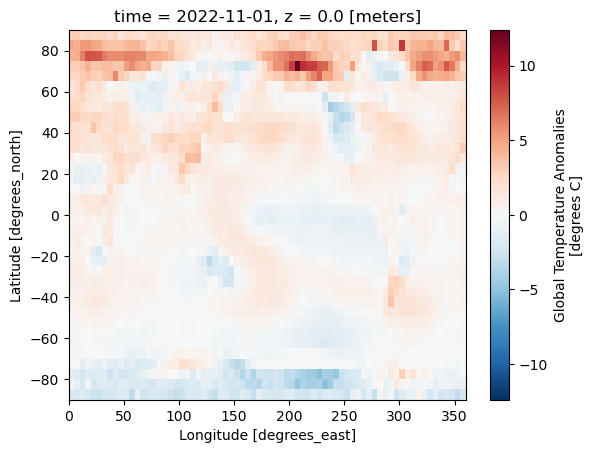

In [9]:
data_for_desired_date['anom'].plot()

Without the coastlines these data are difficult to interpret. Let's now explore how to improve this plot and perhaps use some different projections. 

### Full working example

Below is a full working example you can copy and play with.

OSError: [Errno -90] NetCDF: file not found: b'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc'

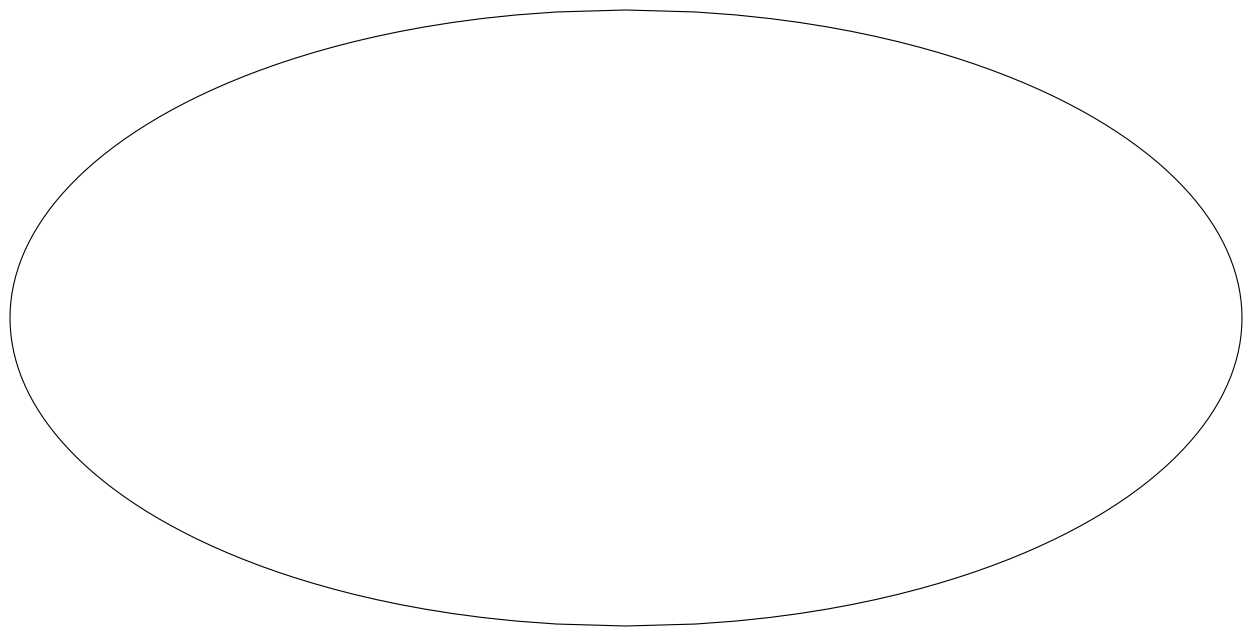

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

desired_date = '2024-11-01'  # Date of interest
projection = ccrs.Mollweide()  # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
transform = ccrs.PlateCarree()  # Data coordinate reference system 
cmap = 'seismic'  # Select from diverging colour maps at https://matplotlib.org/stable/users/explain/colors/colormaps.html#diverging
missing_values_colour = 'black'  # Colour to fill areas outside the data extent

# Set up the figure and axes for plotting
fig = plt.figure(figsize=(16, 8)) 
ax = plt.axes(projection=projection)

# Load the data from the remote THREDDS server
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc'
xrds = xr.open_dataset(url)

# Select the data for the desired date (nearest available date if exact match isn't found)
data_for_desired_date = xrds.sel(time=desired_date, method='nearest')

# Compute the colour map range (vmin, vmax) by ignoring NaN values
vmin = xrds['anom'].min(skipna=True).compute()
vmax = xrds['anom'].max(skipna=True).compute()
abs_max = max(abs(vmin), abs(vmax))  # Use the maximum absolute value for the colour map range

# Plot the temperature anomaly data for the selected date
data_for_desired_date['anom'].plot(
    ax=ax,
    transform=transform,  # Reproject the data from Plate Carree to the map projection
    vmin=-abs_max,
    vmax=abs_max, 
    cmap=cmap
)

# Add background to areas outside the data extent (areas without data)
xmin, xmax, ymin, ymax = ax.get_extent(transform)
ax.add_patch(plt.Rectangle(
    (xmin, ymin), xmax - xmin, ymax - ymin,  # Create a rectangle to cover the areas outside the data
    facecolor=missing_values_colour,  # Fill the rectangle with the chosen colour
    transform=transform,  # Apply the correct projection to the rectangle
    zorder=-1  # Ensure the rectangle is drawn behind the data
))

ax.coastlines()  # Draw coastlines on the map

plt.savefig('Global_surface_tempature_anomalies.png')
plt.show()

## Zooming in on area of interest

Let's now provide a latitude and longitude range to zoom in on.

If you have an xarray object, for example:

In [11]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc'
xrds = xr.open_dataset(url)
desired_date = '2024-11-01'
data_for_desired_date = xrds.sel(time=desired_date, method='nearest')
data_for_desired_date

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 8B 2024-11-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (z, lat, lon) float32 10kB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P174Y11M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2024-12-08T19:59:56Z
    date_issued:                     2024-12-08T19:59:56Z

Let's first take a subset of that for our desired range

In [12]:
lat_range = slice(36, 74)
lon_range = slice(0, 45)
data_aoi = data_for_desired_date.sel(lat=lat_range, lon=lon_range)
data_aoi

<xarray.Dataset> Size: 368B
Dimensions:  (lat: 8, lon: 9, z: 1)
Coordinates:
    time     datetime64[ns] 8B 2024-11-01
  * lat      (lat) float32 32B 37.5 42.5 47.5 52.5 57.5 62.5 67.5 72.5
  * lon      (lon) float32 36B 2.5 7.5 12.5 17.5 22.5 27.5 32.5 37.5 42.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (z, lat, lon) float32 288B ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P174Y11M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2024-12-08T19:59:56Z
    date_issued:                     2024-12-08T19:59:56Z

This can be more complicated if you need to handled wrapped longitude ranges. You can do this instead.

In [13]:
data_aoi = data_for_desired_date.sel(
    lat=slice(36, 74), lon=((data_for_desired_date.lon >= 335) | (data_for_desired_date.lon <= 45))
)
data_aoi['lon'].values

array([  2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
       337.5, 342.5, 347.5, 352.5, 357.5], dtype=float32)

We can then proceed to plotting the data as normal.

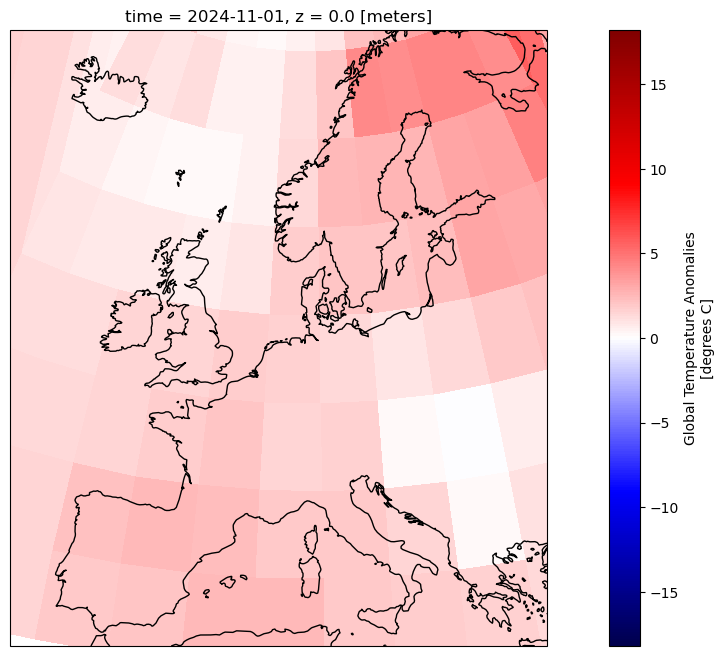

In [14]:
fig = plt.figure(figsize=(16, 8))
projection = ccrs.EuroPP()
ax = plt.axes(projection=projection)

data_aoi['anom'].plot(
    ax=ax,
    transform=transform,
    vmin=-abs_max,
    vmax=abs_max, 
    cmap=cmap
)

ax.coastlines()  # Draw coastlines on the map
plt.show()

### Full working example

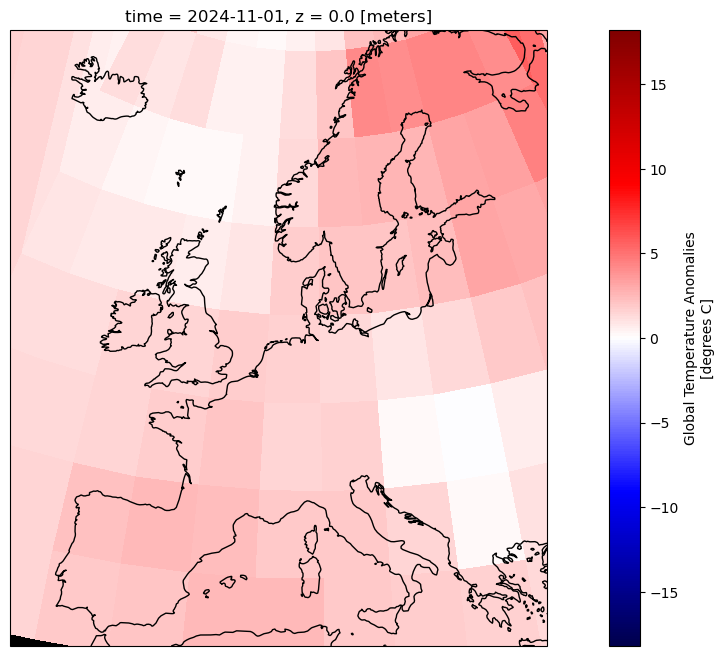

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

desired_date = '2024-11-01'  # Date of interest
projection = ccrs.EuroPP()  # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
transform = ccrs.PlateCarree()  # Data coordinate reference system 
cmap = 'seismic'  # Select from diverging colour maps at https://matplotlib.org/stable/users/explain/colors/colormaps.html#diverging
missing_values_colour = 'black'  # Colour to fill areas outside the data extent

# Set up the figure and axes for plotting
fig = plt.figure(figsize=(16, 8)) 
ax = plt.axes(projection=projection)


# Load the data from the remote THREDDS server
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc'
xrds = xr.open_dataset(url)

# Select the data for the desired date (nearest available date if exact match isn't found)
data_for_desired_date = xrds.sel(time=desired_date, method='nearest')

# Selecting data around Europe
data_aoi = data_for_desired_date.sel(
    lat=slice(36, 74), lon=((data_for_desired_date.lon >= 335) | (data_for_desired_date.lon <= 45))
)
data_aoi['lon'].values

# Compute the colour map range (vmin, vmax) by ignoring NaN values
vmin = xrds['anom'].min(skipna=True).compute()
vmax = xrds['anom'].max(skipna=True).compute()
abs_max = max(abs(vmin), abs(vmax))  # Use the maximum absolute value for the colour map range

# Plot the temperature anomaly data for the selected date
data_aoi['anom'].plot(
    ax=ax,
    transform=transform,  # Reproject the data from Plate Carree to the map projection
    vmin=-abs_max,
    vmax=abs_max, 
    cmap=cmap
)

# Add background to areas outside the data extent (areas without data)
xmin, xmax, ymin, ymax = ax.get_extent(transform)
ax.add_patch(plt.Rectangle(
    (xmin, ymin), xmax - xmin, ymax - ymin,  # Create a rectangle to cover the areas outside the data
    facecolor=missing_values_colour,  # Fill the rectangle with the chosen colour
    transform=transform,  # Apply the correct projection to the rectangle
    zorder=-1  # Ensure the rectangle is drawn behind the data
))

ax.coastlines()  # Draw coastlines on the map

plt.show()



## Mean annual temperature anomaly

We can compute the mean annual temperature from the monthly averages. Let's first select a year, then compute the mean anomalies for that year.

In [16]:
# Select one year of data and then find the mean annual temperature anomalies
year = 2019
data_for_desired_year = xrds.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
mean_annual_anom = data_for_desired_year['anom'].mean(dim='time')
mean_annual_anom

<xarray.DataArray 'anom' (z: 1, lat: 36, lon: 72)> Size: 10kB
array([[[-0.68018967, -0.33331403, -0.74959034, ..., -0.03837236,
         -0.61273843, -0.42502487],
        [-0.47343197, -0.7681505 , -0.66645616, ..., -0.37497488,
         -0.54488105, -0.7633578 ],
        [-0.63680077, -0.5978392 , -0.52295524, ..., -0.5739642 ,
         -0.9656647 , -0.970609  ],
        ...,
        [ 1.4802022 ,  1.5110192 ,  2.3255289 , ...,  1.0480558 ,
          0.94093925,  1.024701  ],
        [ 1.5863317 ,  1.7522281 ,  1.5801697 , ...,  2.3302002 ,
          1.8906888 ,  1.8085246 ],
        [ 2.1524503 ,  2.2289383 ,  2.2152383 , ...,  2.7628334 ,
          2.478718  ,  2.342243  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0

We can then plot the data as done previously. Let's try a different projection to mix things up a bit. 

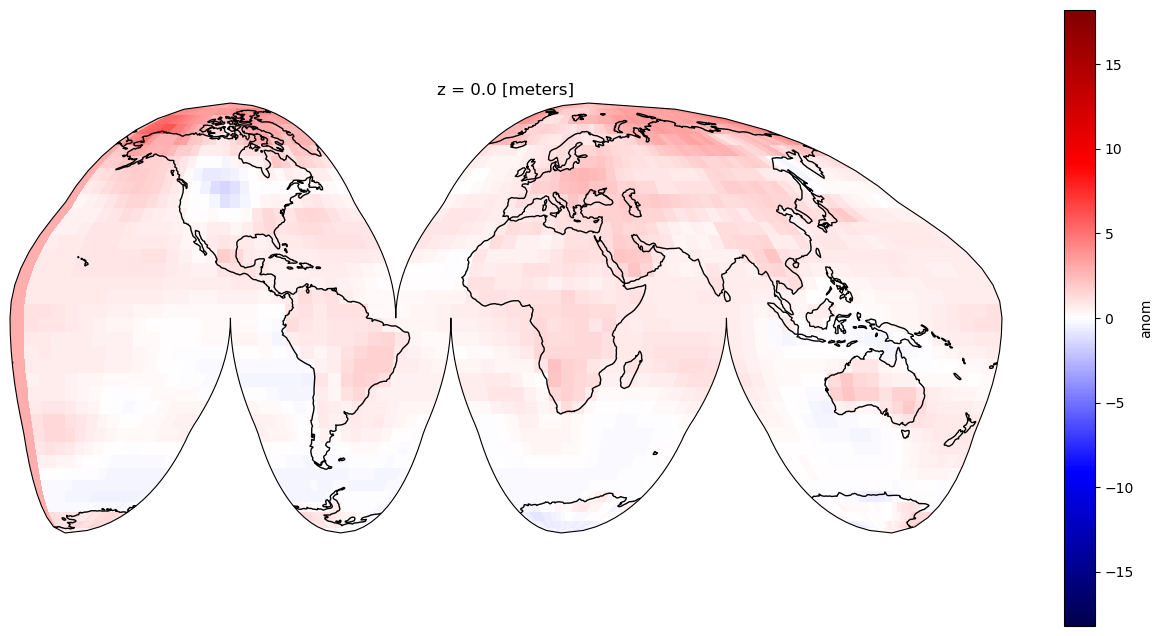

In [17]:
fig = plt.figure(figsize=(16, 8))
projection = ccrs.InterruptedGoodeHomolosine()
ax = plt.axes(projection=projection)

mean_annual_anom.plot(
    ax=ax,
    transform=transform,
    vmin=-abs_max,
    vmax=abs_max, 
    cmap=cmap
)

ax.coastlines()  # Draw coastlines on the map
plt.show()

### Full working example

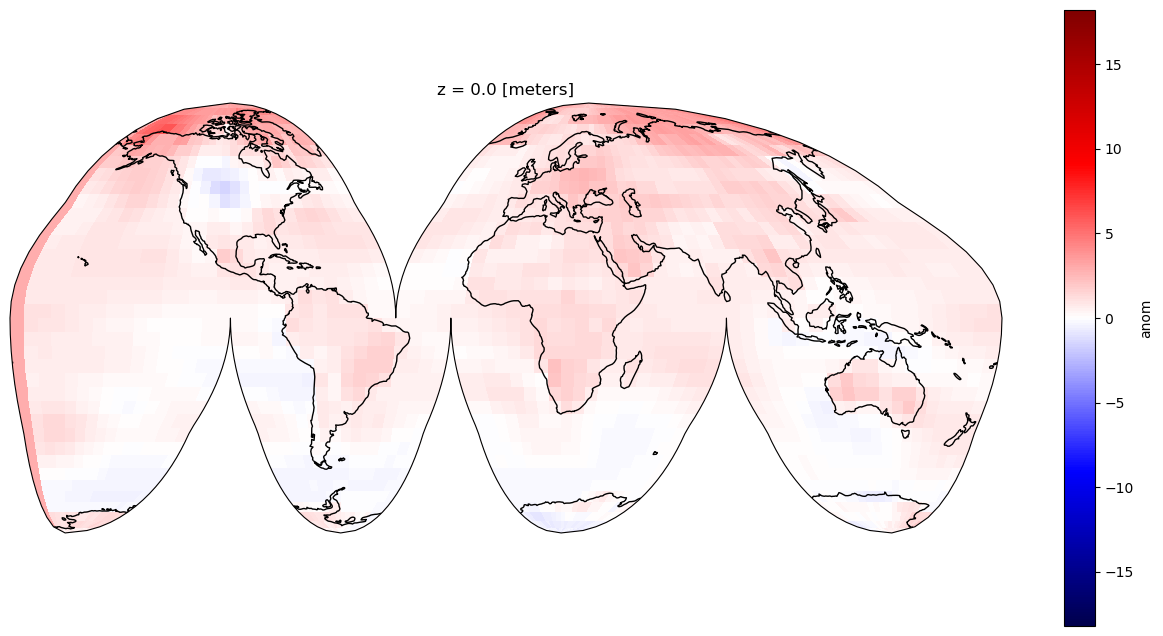

In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

year = 2024
projection = ccrs.InterruptedGoodeHomolosine()  # Map projection for visualisation https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
transform = ccrs.PlateCarree()  # Data coordinate reference system 
cmap = 'seismic'  # Select from diverging colour maps at https://matplotlib.org/stable/users/explain/colors/colormaps.html#diverging
missing_values_colour = 'black'  # Colour to fill areas outside the data extent

# Set up the figure and axes for plotting
fig = plt.figure(figsize=(16, 8)) 
ax = plt.axes(projection=projection)

# Load the data from the remote THREDDS server
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202411_c20241208T145954.nc'
xrds = xr.open_dataset(url)

year = 2019
data_for_desired_year = xrds.sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
mean_annual_anom = data_for_desired_year['anom'].mean(dim='time')

# Compute the colour map range (vmin, vmax) by ignoring NaN values
vmin = xrds['anom'].min(skipna=True).compute()
vmax = xrds['anom'].max(skipna=True).compute()
abs_max = max(abs(vmin), abs(vmax))  # Use the maximum absolute value for the colour map range

# Plot the temperature anomaly data for the selected date
mean_annual_anom.plot(
    ax=ax,
    transform=transform,  # Reproject the data from Plate Carree to the map projection
    vmin=-abs_max,
    vmax=abs_max, 
    cmap=cmap
)

# Add background to areas outside the data extent (areas without data)
xmin, xmax, ymin, ymax = ax.get_extent(transform)
ax.add_patch(plt.Rectangle(
    (xmin, ymin), xmax - xmin, ymax - ymin,  # Create a rectangle to cover the areas outside the data
    facecolor=missing_values_colour,  # Fill the rectangle with the chosen colour
    transform=transform,  # Apply the correct projection to the rectangle
    zorder=-1  # Ensure the rectangle is drawn behind the data
))

ax.coastlines()  # Draw coastlines on the map

plt.show()